# Chapter 3 - Modeling and prediction

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### The Titanic dataset

We use the Pandas library to import the Titanic survival dataset.

In [27]:
import pandas
data = pandas.read_csv("data/titanic.csv")
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [30]:
# We make a 80/20% train/test split of the data
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

### Preparing the data

In [46]:
# The categorical-to-numerical function from chapter 2
# Changed to automatically add column names
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [57]:
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked']) )
    
    return features

### Building a logistic regression classifier with Scikit-Learn

In [58]:
#cat_to_num(data['Sex'])
features = prepare_data(data_train)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=C,Embarked=Q,Embarked=S,Embarked=nan
0,3,22,1,0,2.692582,0,1,0,0,1,0
1,1,38,1,0,8.442944,1,0,1,0,0,0
2,3,26,0,0,2.815138,1,0,0,0,1,0
3,1,35,1,0,7.286975,1,0,0,0,1,0
4,3,35,0,0,2.837252,0,1,0,0,1,0


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [60]:
# Make predictions
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [64]:
# The accuracy of the model on the test data
# (this will be introduced in more details in chapter 4)
model.score(prepare_data(data_test), data_test["Survived"])

0.86033519553072624

### Non-linear model with Support Vector Machines

In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(features, data_train["Survived"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
model.score(prepare_data(data_test), data_test["Survived"])

0.86033519553072624

### Classification with multiple classes: hand-written digits

We use the popular non-linear multi-class K-nearest neighbor algorithm to predict hand-written digits from the MNIST dataset.


In [65]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [71]:
preds = knn.predict_proba(mnist_test.drop("label", axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0
Digit 2,0.0,0,0,1.0,0.0,0,0.0,0.0,0.0,0.0
Digit 3,0.3,0,0,0.0,0.0,0,0.6,0.0,0.1,0.0
Digit 4,0.0,0,0,0.1,0.0,0,0.0,0.5,0.0,0.4
Digit 5,0.0,0,0,0.0,0.7,0,0.0,0.0,0.0,0.3


In [73]:
knn.score(mnist_test.drop("label", axis=1), mnist_test['label'])

0.81999999999999995

### Predicting numerical values with a regression model

We use the the Linear Regression algorithm to predict miles-per-gallon of various automobiles.

In [79]:
auto = pandas.read_csv("data/auto-mpg.csv")

# Convert origin to categorical variable
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

# Split in train/test set
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18,8,307,130,3504,12.0,70,1,0,0
1,15,8,350,165,3693,11.5,70,1,0,0
2,18,8,318,150,3436,11.0,70,1,0,0
3,16,8,304,150,3433,12.0,70,1,0,0
4,17,8,302,140,3449,10.5,70,1,0,0


In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(auto_train.drop('mpg', axis=1), auto_train["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
pred_mpg = reg.predict(auto_test.drop('mpg',axis=1))

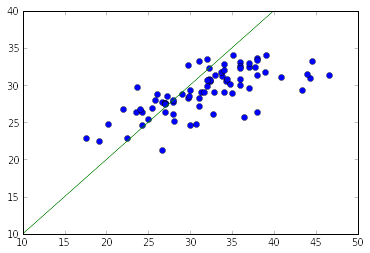

In [89]:
plot(auto_test.mpg, pred_mpg, 'o')
x = linspace(10,40,5)
plot(x, x, '-');